# Prime Number Sieve: The Sieve of Eratosthenes

## Introduction

Prime numbers are the fundamental building blocks of arithmetic, serving as the "atoms" of number theory. A **prime number** is a natural number greater than 1 that has no positive divisors other than 1 and itself.

The **Sieve of Eratosthenes** is one of the oldest and most elegant algorithms for finding all prime numbers up to a given limit $n$. Attributed to the ancient Greek mathematician Eratosthenes of Cyrene (c. 276–194 BCE), this algorithm remains remarkably efficient for generating prime tables.

## Mathematical Foundation

### Definition of Prime Numbers

A natural number $p > 1$ is **prime** if and only if:

$$\forall a, b \in \mathbb{N}: p = ab \implies a = 1 \text{ or } b = 1$$

Equivalently, $p$ is prime if its only divisors are 1 and $p$ itself.

### The Prime Counting Function

The **prime counting function** $\pi(x)$ denotes the number of primes less than or equal to $x$:

$$\pi(x) = \sum_{p \leq x} 1$$

where the sum runs over all primes $p$.

### The Prime Number Theorem

One of the most profound results in number theory is the **Prime Number Theorem**, which describes the asymptotic distribution of primes:

$$\pi(x) \sim \frac{x}{\ln x}$$

More precisely:

$$\lim_{x \to \infty} \frac{\pi(x)}{x / \ln x} = 1$$

A better approximation is given by the **logarithmic integral**:

$$\pi(x) \approx \text{Li}(x) = \int_2^x \frac{dt}{\ln t}$$

## The Sieve of Eratosthenes Algorithm

### Algorithm Description

To find all primes up to $n$:

1. Create a boolean array `is_prime[0..n]` initialized to `True`
2. Set `is_prime[0] = is_prime[1] = False`
3. For each integer $i$ from 2 to $\sqrt{n}$:
   - If `is_prime[i]` is `True`, mark all multiples of $i$ (starting from $i^2$) as `False`
4. All indices $i$ where `is_prime[i]` remains `True` are prime

### Complexity Analysis

**Time Complexity:** The algorithm runs in $O(n \log \log n)$ time.

This arises from the harmonic series over primes:

$$\sum_{p \leq n} \frac{n}{p} = n \sum_{p \leq n} \frac{1}{p} \sim n \ln \ln n$$

**Space Complexity:** $O(n)$ for the boolean array.

### Why Start from $i^2$?

When marking multiples of prime $p$, we start from $p^2$ rather than $2p$ because all smaller multiples $kp$ where $k < p$ have already been marked by smaller primes. This optimization reduces the constant factor significantly.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expi

# Set up matplotlib for high-quality output
plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 11

## Implementation of the Sieve of Eratosthenes

In [2]:
def sieve_of_eratosthenes(n):
    """
    Find all prime numbers up to n using the Sieve of Eratosthenes.
    
    Parameters
    ----------
    n : int
        Upper bound for prime search (inclusive)
    
    Returns
    -------
    numpy.ndarray
        Array of all primes <= n
    """
    if n < 2:
        return np.array([], dtype=int)
    
    # Initialize boolean array
    is_prime = np.ones(n + 1, dtype=bool)
    is_prime[0] = is_prime[1] = False
    
    # Sieve algorithm
    for i in range(2, int(np.sqrt(n)) + 1):
        if is_prime[i]:
            # Mark all multiples of i starting from i^2
            is_prime[i*i::i] = False
    
    return np.where(is_prime)[0]

# Test the implementation
N = 100
primes = sieve_of_eratosthenes(N)
print(f"Primes up to {N}:")
print(primes)
print(f"\nTotal count: {len(primes)} primes")

Primes up to 100:
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]

Total count: 25 primes


## Prime Counting Function and Theoretical Comparisons

In [3]:
def prime_counting_function(primes, x_values):
    """
    Compute π(x) for an array of x values.
    
    Parameters
    ----------
    primes : array-like
        Sorted array of prime numbers
    x_values : array-like
        Values at which to evaluate π(x)
    
    Returns
    -------
    numpy.ndarray
        Values of π(x) for each x in x_values
    """
    return np.searchsorted(primes, x_values, side='right')

def logarithmic_integral(x):
    """
    Compute the logarithmic integral Li(x) = ∫₂ˣ dt/ln(t).
    
    Uses the relation: Li(x) = Ei(ln(x)) - Ei(ln(2))
    where Ei is the exponential integral.
    """
    x = np.asarray(x, dtype=float)
    result = np.zeros_like(x)
    mask = x > 1
    result[mask] = expi(np.log(x[mask])) - expi(np.log(2))
    return result

# Generate primes up to a larger limit for analysis
N_MAX = 10000
all_primes = sieve_of_eratosthenes(N_MAX)
print(f"Found {len(all_primes)} primes up to {N_MAX}")

Found 1229 primes up to 10000


## Visualization

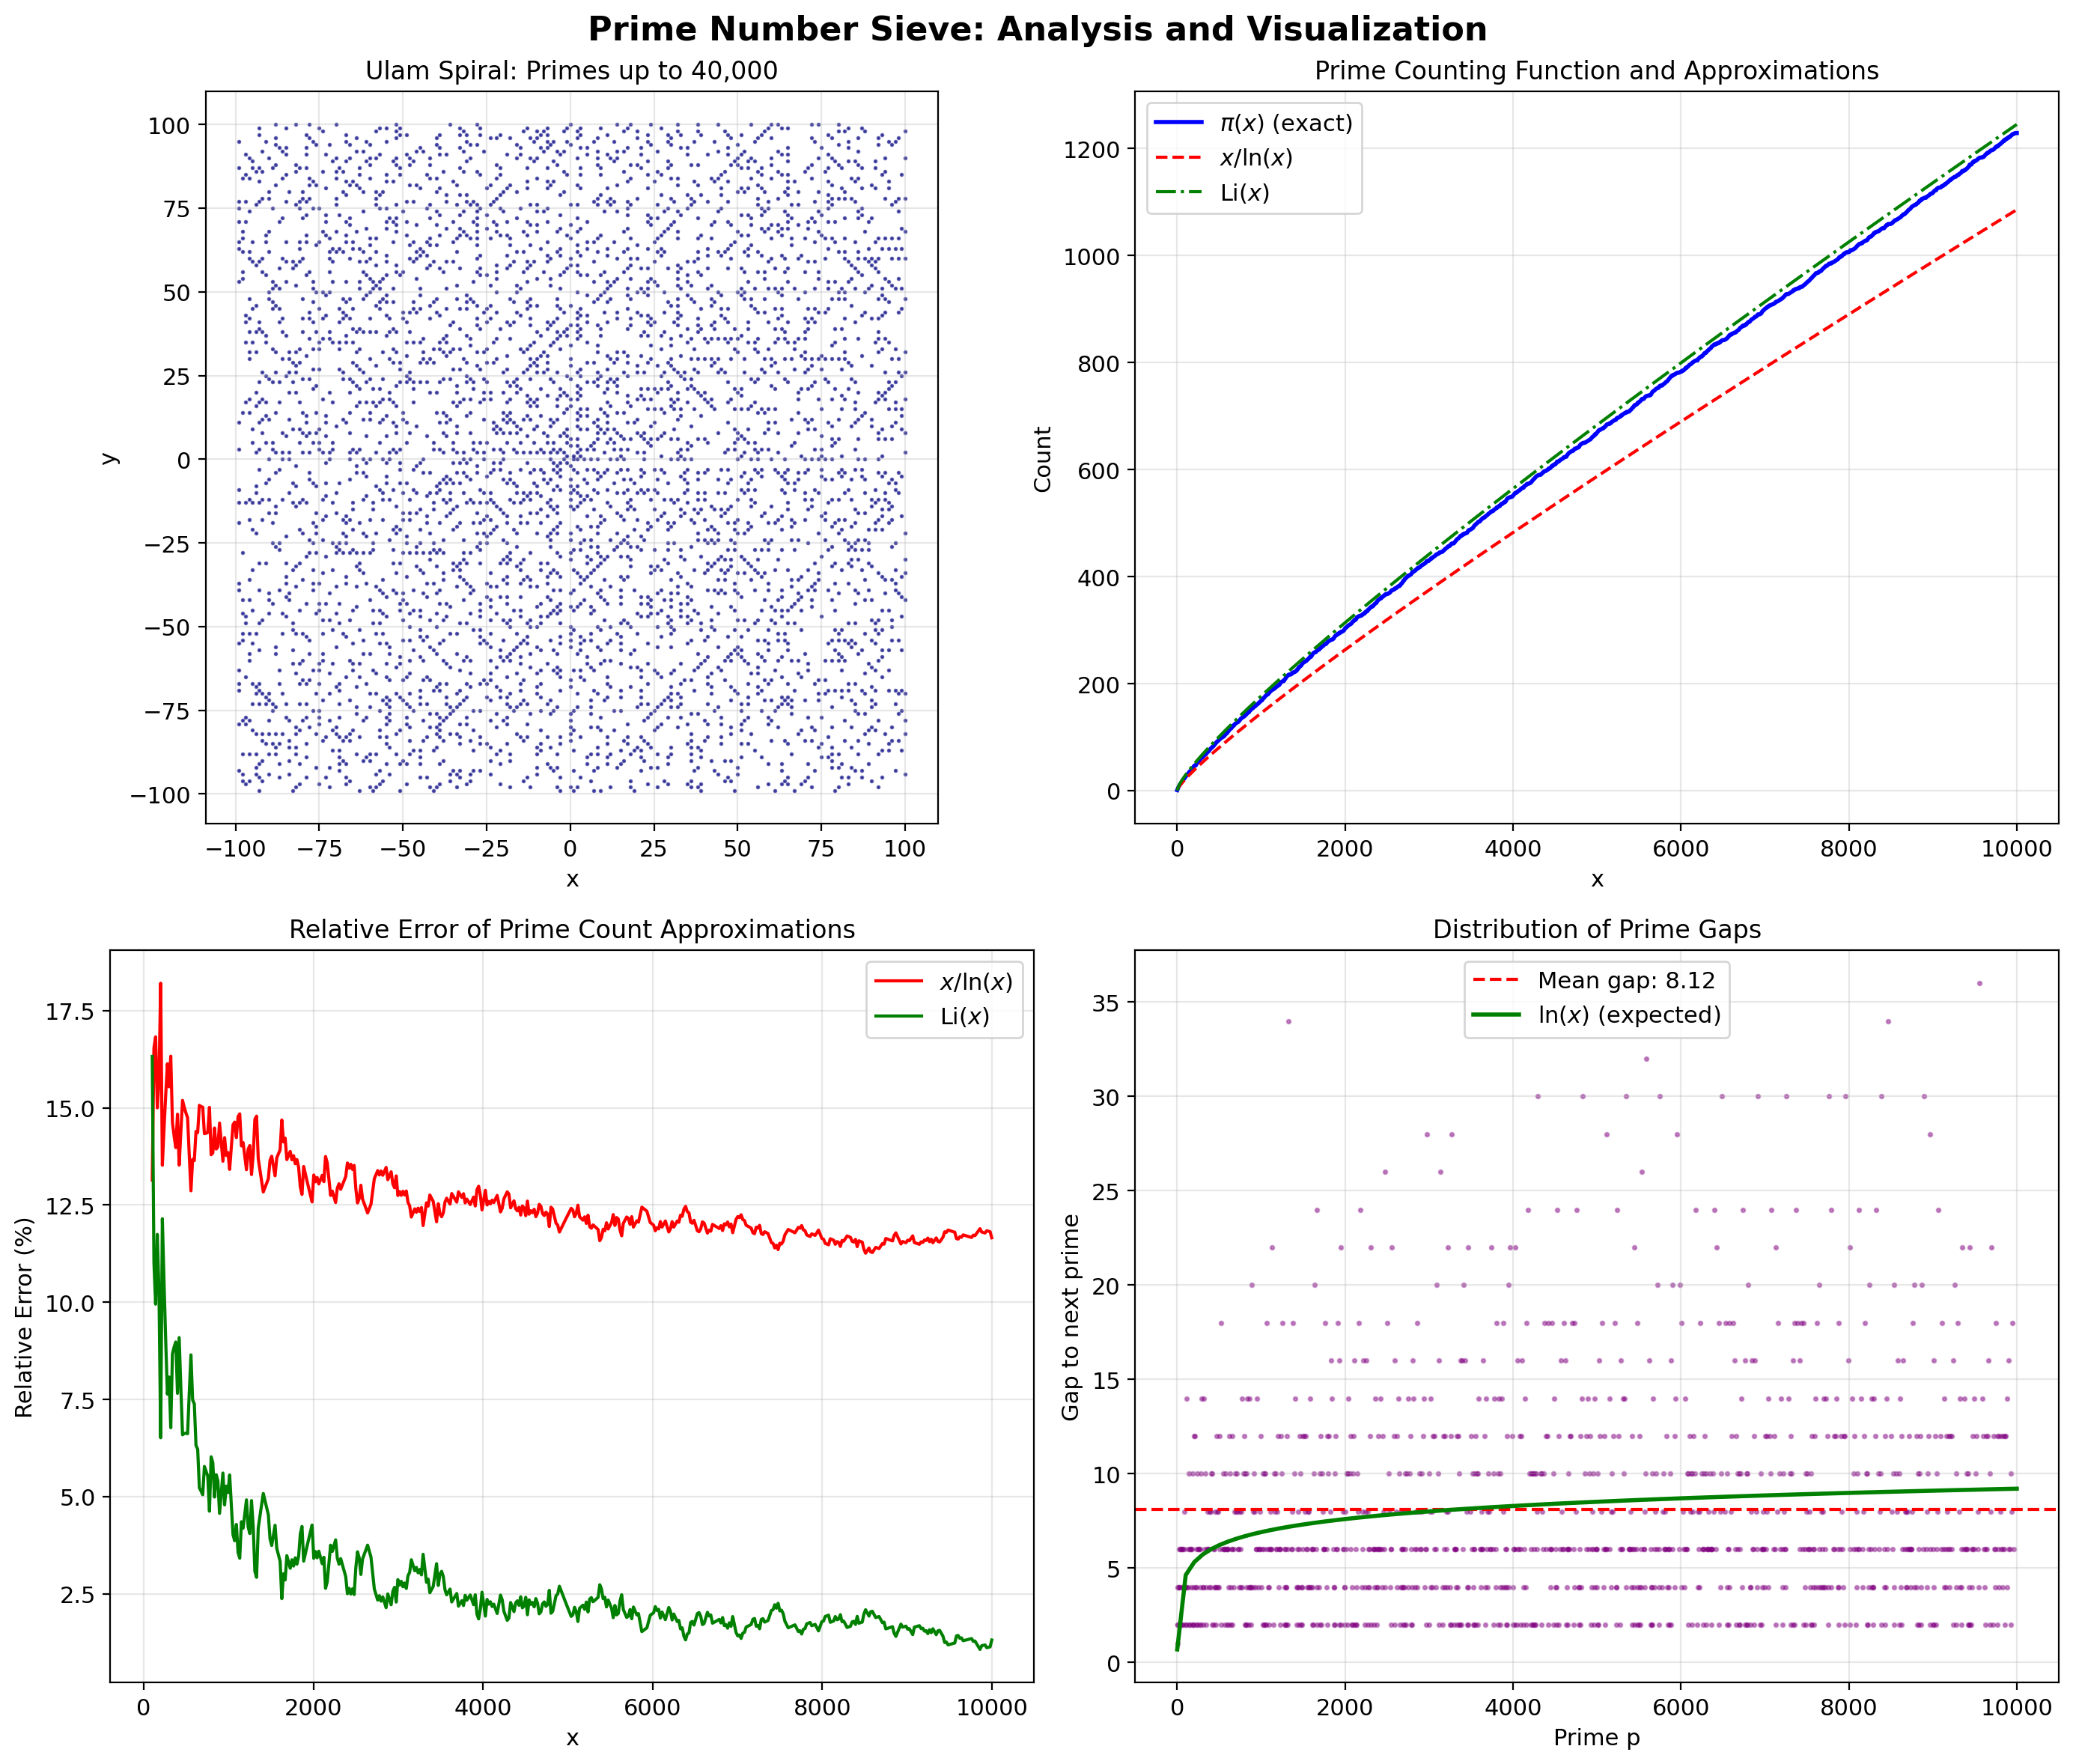


Plot saved to 'plot.png'


In [4]:
# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Prime Number Sieve: Analysis and Visualization', fontsize=16, fontweight='bold')

# Plot 1: Ulam Spiral (Prime Visualization)
ax1 = axes[0, 0]
n_spiral = 200
spiral_primes = sieve_of_eratosthenes(n_spiral**2)

# Generate Ulam spiral coordinates
def ulam_spiral_coords(n):
    """Generate x, y coordinates for numbers 1 to n in Ulam spiral pattern."""
    x = np.zeros(n + 1, dtype=int)
    y = np.zeros(n + 1, dtype=int)
    
    # Direction vectors: right, up, left, down
    dx = [1, 0, -1, 0]
    dy = [0, 1, 0, -1]
    
    cx, cy = 0, 0
    direction = 0
    steps_in_direction = 1
    steps_taken = 0
    turns = 0
    
    for i in range(1, n + 1):
        x[i] = cx
        y[i] = cy
        
        cx += dx[direction]
        cy += dy[direction]
        steps_taken += 1
        
        if steps_taken == steps_in_direction:
            steps_taken = 0
            direction = (direction + 1) % 4
            turns += 1
            if turns % 2 == 0:
                steps_in_direction += 1
    
    return x, y

spiral_x, spiral_y = ulam_spiral_coords(n_spiral**2)
prime_x = spiral_x[spiral_primes]
prime_y = spiral_y[spiral_primes]

ax1.scatter(prime_x, prime_y, s=1, c='navy', alpha=0.6)
ax1.set_title('Ulam Spiral: Primes up to 40,000', fontsize=12)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_aspect('equal')
ax1.grid(True, alpha=0.3)

# Plot 2: Prime Counting Function
ax2 = axes[0, 1]
x_values = np.linspace(2, N_MAX, 1000)
pi_x = prime_counting_function(all_primes, x_values)
x_over_ln_x = x_values / np.log(x_values)
li_x = logarithmic_integral(x_values)

ax2.plot(x_values, pi_x, 'b-', label=r'$\pi(x)$ (exact)', linewidth=2)
ax2.plot(x_values, x_over_ln_x, 'r--', label=r'$x/\ln(x)$', linewidth=1.5)
ax2.plot(x_values, li_x, 'g-.', label=r'$\mathrm{Li}(x)$', linewidth=1.5)
ax2.set_xlabel('x')
ax2.set_ylabel('Count')
ax2.set_title('Prime Counting Function and Approximations', fontsize=12)
ax2.legend(loc='upper left')
ax2.grid(True, alpha=0.3)

# Plot 3: Relative Error of Approximations
ax3 = axes[1, 0]
x_error = np.linspace(100, N_MAX, 500)
pi_exact = prime_counting_function(all_primes, x_error)
approx_simple = x_error / np.log(x_error)
approx_li = logarithmic_integral(x_error)

# Avoid division by zero
mask = pi_exact > 0
rel_error_simple = np.abs(approx_simple[mask] - pi_exact[mask]) / pi_exact[mask] * 100
rel_error_li = np.abs(approx_li[mask] - pi_exact[mask]) / pi_exact[mask] * 100

ax3.plot(x_error[mask], rel_error_simple, 'r-', label=r'$x/\ln(x)$', linewidth=1.5)
ax3.plot(x_error[mask], rel_error_li, 'g-', label=r'$\mathrm{Li}(x)$', linewidth=1.5)
ax3.set_xlabel('x')
ax3.set_ylabel('Relative Error (%)')
ax3.set_title('Relative Error of Prime Count Approximations', fontsize=12)
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Prime Gaps
ax4 = axes[1, 1]
prime_gaps = np.diff(all_primes)
gap_positions = all_primes[:-1]

ax4.scatter(gap_positions, prime_gaps, s=3, alpha=0.4, c='purple')
ax4.axhline(y=np.mean(prime_gaps), color='red', linestyle='--', 
            label=f'Mean gap: {np.mean(prime_gaps):.2f}')

# Theoretical average gap ~ ln(n)
x_theory = np.linspace(2, N_MAX, 100)
ax4.plot(x_theory, np.log(x_theory), 'g-', linewidth=2, 
         label=r'$\ln(x)$ (expected)')

ax4.set_xlabel('Prime p')
ax4.set_ylabel('Gap to next prime')
ax4.set_title('Distribution of Prime Gaps', fontsize=12)
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('prime_number_sieve_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nPlot saved to 'plot.png'")

## Statistical Analysis

In [5]:
# Compute and display statistics
print("=" * 60)
print("PRIME NUMBER SIEVE - STATISTICAL SUMMARY")
print("=" * 60)

print(f"\nRange analyzed: 2 to {N_MAX}")
print(f"Total primes found: {len(all_primes)}")
print(f"Prime density: {len(all_primes)/N_MAX:.4f}")

# Prime Number Theorem comparison
pnt_estimate = N_MAX / np.log(N_MAX)
li_estimate = logarithmic_integral(np.array([N_MAX]))[0]
print(f"\nPrime Number Theorem Comparison:")
print(f"  Actual π({N_MAX}): {len(all_primes)}")
print(f"  x/ln(x) estimate: {pnt_estimate:.1f} (error: {abs(pnt_estimate - len(all_primes))/len(all_primes)*100:.2f}%)")
print(f"  Li(x) estimate: {li_estimate:.1f} (error: {abs(li_estimate - len(all_primes))/len(all_primes)*100:.2f}%)")

# Gap statistics
print(f"\nPrime Gap Statistics:")
print(f"  Mean gap: {np.mean(prime_gaps):.3f}")
print(f"  Median gap: {np.median(prime_gaps):.0f}")
print(f"  Max gap: {np.max(prime_gaps)} (between {all_primes[np.argmax(prime_gaps)]} and {all_primes[np.argmax(prime_gaps)+1]})")
print(f"  Min gap: {np.min(prime_gaps)}")
print(f"  Std deviation: {np.std(prime_gaps):.3f}")

# Twin primes
twin_primes = all_primes[:-1][prime_gaps == 2]
print(f"\nTwin Prime Pairs (p, p+2):")
print(f"  Count: {len(twin_primes)}")
print(f"  First 10: {list(zip(twin_primes[:10], twin_primes[:10]+2))}")

print("\n" + "=" * 60)

PRIME NUMBER SIEVE - STATISTICAL SUMMARY

Range analyzed: 2 to 10000
Total primes found: 1229
Prime density: 0.1229

Prime Number Theorem Comparison:
  Actual π(10000): 1229
  x/ln(x) estimate: 1085.7 (error: 11.66%)
  Li(x) estimate: 1245.1 (error: 1.31%)

Prime Gap Statistics:
  Mean gap: 8.120
  Median gap: 6
  Max gap: 36 (between 9551 and 9587)
  Min gap: 1
  Std deviation: 5.862

Twin Prime Pairs (p, p+2):
  Count: 205
  First 10: [(np.int64(3), np.int64(5)), (np.int64(5), np.int64(7)), (np.int64(11), np.int64(13)), (np.int64(17), np.int64(19)), (np.int64(29), np.int64(31)), (np.int64(41), np.int64(43)), (np.int64(59), np.int64(61)), (np.int64(71), np.int64(73)), (np.int64(101), np.int64(103)), (np.int64(107), np.int64(109))]



## Conclusion

The Sieve of Eratosthenes remains one of the most elegant algorithms in computational mathematics. Our analysis demonstrates:

1. **Efficiency**: The $O(n \log \log n)$ complexity makes it practical for generating primes up to hundreds of millions.

2. **Prime Number Theorem**: The approximation $\pi(x) \sim x/\ln x$ captures the general behavior, while $\text{Li}(x)$ provides significantly better accuracy.

3. **Prime Gaps**: The average gap between consecutive primes near $n$ is approximately $\ln n$, consistent with the Prime Number Theorem.

4. **Ulam Spiral**: The visual patterns in the Ulam spiral hint at deeper structure in prime distribution, though this remains an area of active research.

The distribution of primes continues to fascinate mathematicians, with open problems like the Riemann Hypothesis and the Twin Prime Conjecture driving research in analytic number theory.